# ТЕОРИЯ

# 1 Соревнование

Получается нам дана первичная структура белка - линейная последовательность a1..an аминокислотных остатков в молекуле белка. Нужно получить третичную - расположение элементов вторичной структуры (альфа-спиралей и бета- слоев) в пространстве относительно один другого. 
Таким образом из первичной струткуры сначала нужно получить вторичную, а из нее уже третичную. 

Существующие техники изучения третичной структуры белка — пространственной укладки изгибов, листов и спиралей аминокислотной цепи — проблематичны. Методы разрешения топологии белка включают электронную микроскопию, рентгеноструктурный анализ и ядерную магнитно-резонансную спектроскопию. Чтобы применять их, необходим кристаллизованный белок, замороженный белок, химически обработанный белок или радиоактивно меченный белок соответственно. К тому же сложность процесса подготовки образца усугубляется высокой стоимостью методов.

Я, как начальник лаборатории, нашел решение в применении искусственного интеллекта, так как вышуепомятнутые методы затруднительны. В 2018 году Google DeepMind представила алгоритм AlphaFold, который обошел предшественников по эффективности. На основе последовательности аминокислот нейросеть:

1) Предсказывает расстояния между всеми парами аминокислотных остатков 

2) Предсказывает углы между связями, соединяющими аминокислоты.

К тому же алгоритм самостоятельно оценивает точность своих расчетов.



# 2 Найти гены

?

# ПРАКТИКА

# 1 Выполните глобальное выравнивание, заполнив таблицу динамического программирования для последовательностей CAGCACTTGGATTCTCGG и CAGCGTGG. 
Используйте параметры: (совпадение(match) +1, несовпадение (mismatch) -1, инделы -1). Выпишите веса и оптимальные выравнивания.


In [41]:
from Bio import pairwise2
pairwise2.align.globalms("CAGCACTTGGATTCTCGG", "CAGCGTGG", 1, -1, -1, -1)

[('CAGCACTTGGATTCTCGG', 'CAG--C---G----T-GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAGC-----G----T-GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAG--C--G-----T-GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAGC----G-----T-GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAG--C---G--T---GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAGC-----G--T---GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAG--C--G---T---GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAGC----G---T---GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAG--C---G-T----GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAGC-----G-T----GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAG--C--G--T----GG', -2.0, 0, 18),
 ('CAGCACTTGGATTCTCGG', 'CAGC----G--T----GG', -2.0, 0, 18)]

# 2 Постройте множественное выравнивание всех показанных вариантов мотива.
Постройте матрицу профиля.
Постройте консенсусную строку.
Для выравнивания посчитайте информативность консенсуса.

In [36]:
from Bio.Alphabet import IUPAC, Gapped
from Bio.Align import MultipleSeqAlignment
align = MultipleSeqAlignment([], Gapped(IUPAC.unambiguous_dna, "-"))
align.add_sequence("1", "GAACTCATGGTG")
align.add_sequence("2",  "AAAAGCACGGTC")
align.add_sequence("3", "TCAAAGCAAGGC")
align.add_sequence("4", "CCTAATCAGGGC")
align.add_sequence("5", "AAGTATGGACTC")
align.add_sequence("6", "ACTAAGCAGGGT")
align.add_sequence("7", "TCTCACGGCCCA")
align.add_sequence("8", "CCTCGTGGTGGG")
align.add_sequence("9", "TACCGTATGGTT")
align.add_sequence("10", "ACCACTCGTCGA")

print(align.format("phylip"))

 10 12
1          GAACTCATGG TG
2          AAAAGCACGG TC
3          TCAAAGCAAG GC
4          CCTAATCAGG GC
5          AAGTATGGAC TC
6          ACTAAGCAGG GT
7          TCTCACGGCC CA
8          CCTCGTGGTG GG
9          TACCGTATGG TT
10         ACCACTCGTC GA



# 3 Перевести последовательность из файла cl.fq в формат fasta.

In [38]:
from Bio.Seq import Seq 
from Bio import SeqIO
SeqIO.convert("cl.fq","fastq","cl.fasta","fasta")

250

# 4 Как выглядит комплементарная последовательность к следующей строке нуклеотидов? Пометьте 5’ и 3’ конец результирующей последовательности. 5’-GGATCGTAGCCTA-3’.


In [40]:
seq=Seq("GGATCGTAGCCTA", IUPAC.unambiguous_dna)
print("3'-"+seq.complement()+"-5'")

3'-CCTAGCATCGGAT-5'


# 5 Для следующих двух последовательностей постройте простой точечный график. 

In [45]:
def delta(x,y):
    return 0 if x == y else 1

def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))

def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]

def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)

def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2)



seqx = "GCTAGTCAGATCTGACGCTA"
seqy = "GATGGTCACATCTGCCGC"
dotplot(seqx,seqy)

 |GATGGTCACATCTGCCGC
--------------------
G|■  ■■        ■  ■ 
C|      ■ ■  ■  ■■ ■
T|  ■  ■    ■ ■     
A| ■     ■ ■        
G|■  ■■        ■  ■ 
T|  ■  ■    ■ ■     
C|      ■ ■  ■  ■■ ■
A| ■     ■ ■        
G|■  ■■        ■  ■ 
A| ■     ■ ■        
T|  ■  ■    ■ ■     
C|      ■ ■  ■  ■■ ■
T|  ■  ■    ■ ■     
G|■  ■■        ■  ■ 
A| ■     ■ ■        
C|      ■ ■  ■  ■■ ■
G|■  ■■        ■  ■ 
C|      ■ ■  ■  ■■ ■
T|  ■  ■    ■ ■     
A| ■     ■ ■        


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


# 7 Выровняйте две последовательности seq1 и seq2 используя элементы матрицы BLOSUM50 и штраф за гэп -2

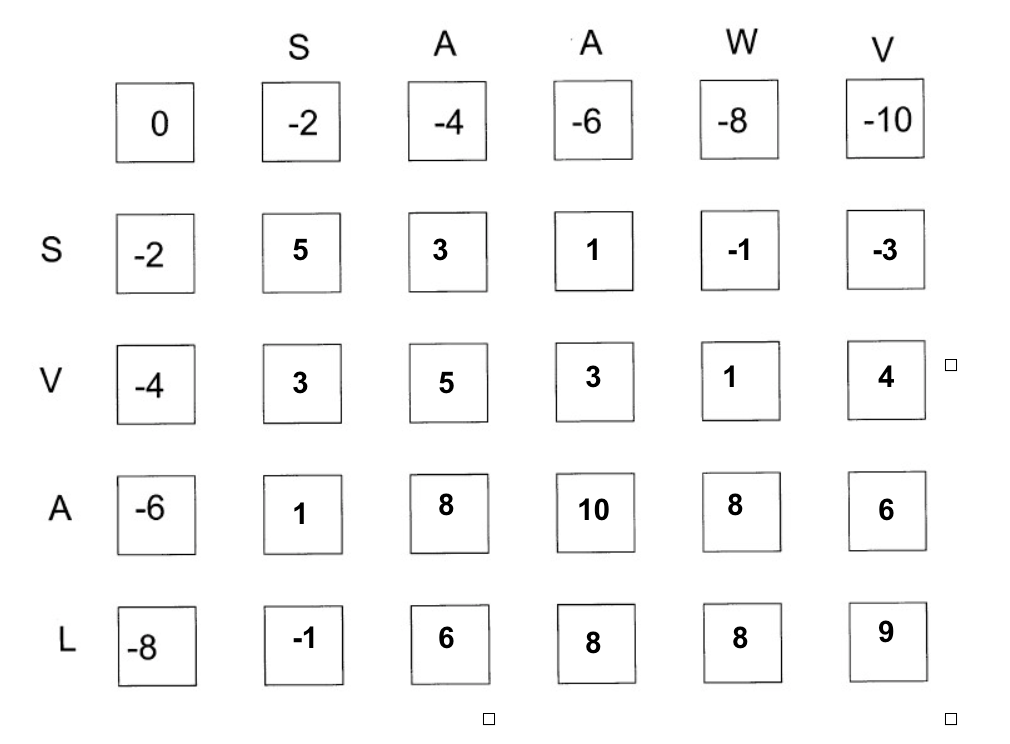

# 13. Заполните следующие таблицы динамического программирования с использованием параметров:
(совпадение(match) +1, несовпадение (mismatch) -1, инделы -1). Запишите оптимальное выравнивание и рассчитанное значение коэффициента сходства двух последовательностей. Покажите в таблице путь соответствующий оптимальному выравниванию.


In [50]:
from numpy import *

def algorithm(ch1, ch2):
    n=len(ch1)+1
    k=len(ch2)+1
    m=[[0 for j in range (k)] for i in range(n)]
    for i in range(n):
        m[i][0]=i
    for j in range(k):
        m[0][j]=j
    for i in range(1,n):
        for j in range(1,k):
            m[i][j]=min(m[i-1][j-1]+ (1 if ch1[i-1]!=ch2[j-1] else 0),m[i][j-1]+1,m[i-1][j]+1)
    print(reshape(m,(n,k)))
    print("Wage is ", m[n-1][k-1])
    
    i=n-1
    j=k-1
    
    resch1=""
    resch2=""
    while i!=0 or j!=0:
        if m[i-1][j-1]<=m[i-1][j] and m[i-1][j-1]<=m[i][j-1]:
            resch1=ch1[i-1]+resch1
            resch2=ch2[j-1]+resch2
            i-=1
            j-=1
        elif m[i-1][j]<=m[i-1][j-1] and m[i-1][j]<=m[i][j-1]:
            resch1=ch1[i-1]+resch1
            resch2="-"+resch2
            i-=1
        else:
            resch1="-"+resch1
            resch2=ch2[j-1]+resch2
            j-=1
    print(resch1)
    print(resch2)

In [51]:
chain1="AACGTTAC"
chain2="CGATAAC"
algorithm(chain1,chain2)

[[0 1 2 3 4 5 6 7]
 [1 1 2 2 3 4 5 6]
 [2 2 2 2 3 3 4 5]
 [3 2 3 3 3 4 4 4]
 [4 3 2 3 4 4 5 5]
 [5 4 3 3 3 4 5 6]
 [6 5 4 4 3 4 5 6]
 [7 6 5 4 4 3 4 5]
 [8 7 6 5 5 4 4 4]]
Wage is  4
AACGTTA-C
--CGATAAC


# 14 В таблице приведено два выравнивания аминокислотных последовательностей KNAAWPG и KQWAALSPG.


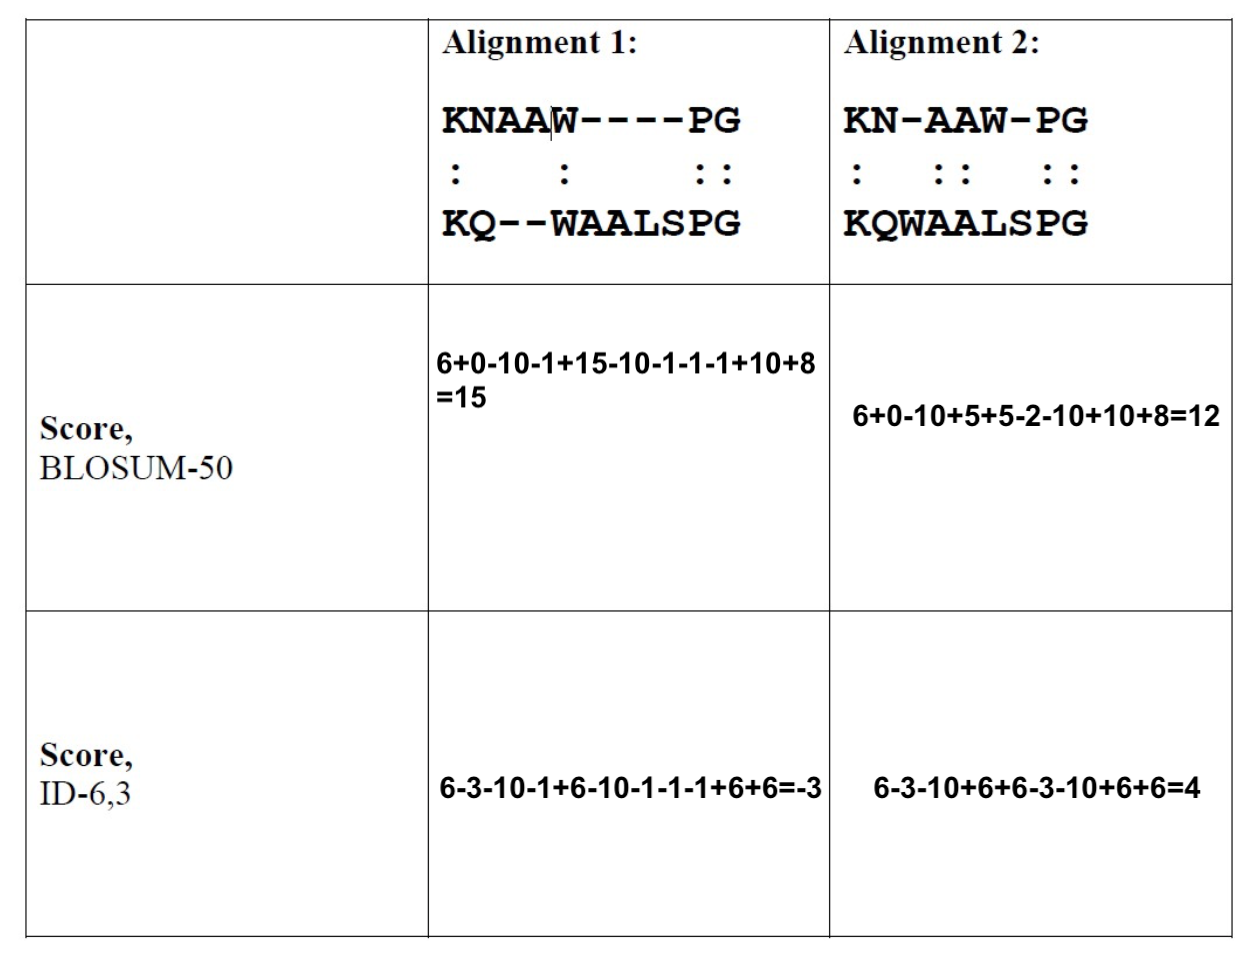